In [23]:
import pandas as pd
from matplotlib import pylab as plt
import numpy as np
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
pal = sns.color_palette()

df_train = pd.read_csv("datasets/train.csv")
df_test = pd.read_csv("datasets/test.csv")

In [46]:
# See top 5 rows(use .head())
## your code here(~~one line~~~)

## end code here

# Basic Statistics

In [26]:
# 1. Please make a list containing all question1 and question2 in df_train
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)
## your code here(~~one line~~~)
train_qs = 
## end code here

print("There are {} questions in df_train".format(len(train_qs)))

There are 808580 questions in df_train


expected return: There are 808580 questions in df_train

In [ ]:
# 2. Please find all duplicate qids in df_train
## your code here(~~four line~~~)
qids =                              # make a list containing all qids (use function: tolist())
                                    # from collections import Counter
qidsCounter =                       # make a Counter count qids
duplicate_qids =                    # find questions haveing count more than 1
## end code here

print("There are {} duplicate qids in df_train".format(len(duplicate_qids)))

expected return: There are 111780 duplicate qids in df_train

In [ ]:
# 3. Please find how many non-duplicate qid in df_train
## your code here(~~one line~~~)
non_duplicate_qid =                 # make a list containing all non-duplicate qids
## end code here

print("There are {} non-duplicate qids in df_train".format(len(non_duplicate_qid)))

expected return: There are 537933 non-duplicate qids in df_train

In [ ]:
# 4. Please use describe() function to calculate average "chars" in question1 and question2 in df_train
## your code here(~~three line)
df =                        #make new DataFrame
df['qlen'] = 
                              #make a list containing length of each query in both question1 and question1
                              #you have to use the following finction: df['<???>'].astype(str).apply(len).tolist() 
                              #use describe() function to show stats info
## end code here

expecte return:
<table>
<tbody>
<tr><td></td><td>qlen</td></tr>
<tr><td>count</td><td>808580.000000</td></tr>
<tr><td>mean</td><td>59.822548</td></tr>
<tr><td>std</td><td>31.963751</td></tr>
<tr><td>min</td><td>1.000000</td></tr>
<tr><td>25%</td><td>39.000000</td></tr>
<tr><td>50%</td><td>51.000000</td></tr>
<tr><td>75%</td><td>72.000000</td></tr>
<tr><td>max</td><td>1169.000000</td></tr>
</tbody>
</table>

In [ ]:
# 5. Please use describe() function to calculate average "terms" in question1 and question2 in df_train
## your code here(~~three line~~~)
df =                        #make new DataFrame
#make a list containing length of each query in both question1 and question1
#you have to use the following finction: [<???> for q in df['<???>'].astype(str)]
df['qlen'] = 
                            #use describe() function to show stats info
## end code here

expecte return:
<table>
<tbody>
<tr><td></td><td>qlen</td></tr>
<tr><td>count</td><td>808580.000000</td></tr>
<tr><td>mean</td><td>11.062100</td></tr>
<tr><td>std</td><td>5.884595</td></tr>
<tr><td>min</td><td>1.000000</td></tr>
<tr><td>25%</td><td>7.000000</td></tr>
<tr><td>50%</td><td>10.000000</td></tr>
<tr><td>75%</td><td>13.000000</td></tr>
<tr><td>max</td><td>237.000000</td></tr>
</tbody>
</table>

Total number of question pairs for training: 404290
Duplicate pairs: 149263
Dupicate percentage: 37.0%
Total number of questions in the training data: 537933
Number of questions that appear multiple times: 111780


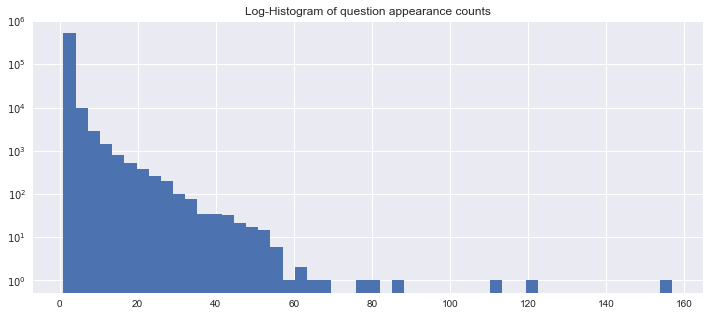

In [3]:
Pairs = len(df_train)
Duplicates = len([item for item in df_train['is_duplicate'] if item == 1])
DuplicatePercentage = round(Duplicates/Pairs, 2)
Queries = df_train['qid1'].tolist()+df_train['qid2'].tolist()

print('Total number of question pairs for training: {}'.format(Pairs))
print('Duplicate pairs: {}'.format(Duplicates))
print('Dupicate percentage: {}%'.format(DuplicatePercentage * 100))
print('Total number of questions in the training data: {}'.format(len(set(Queries))))
print('Number of questions that appear multiple times: {}'.format(sum(pd.Series(Queries).value_counts()>1)))

plt.figure(figsize=(12, 5))
plt.hist(pd.Series(Queries).value_counts(), bins=50)
plt.yscale('log',nonposy='clip')     ##linear or log, nonposy = nonpositive value(= mak or clip)
plt.title('Log-Histogram of question appearance counts')
plt.show()

# Average As Prediction

In [4]:
from sklearn.metrics import log_loss

p = np.average(df_train['is_duplicate'])
log_loss(df_train['is_duplicate'], np.zeros_like(df_train['is_duplicate']) + p)

0.65852738398443544

# Characters Statistics

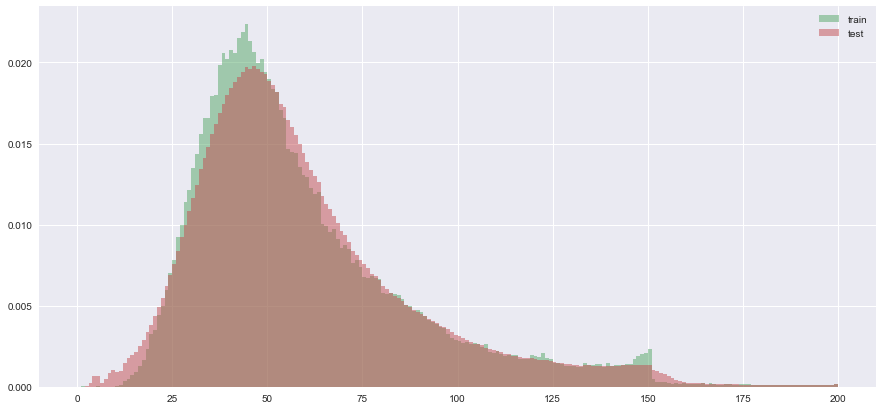

In [5]:
##characters statistics

train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

dist_train = train_qs.apply(len)
dist_test = test_qs.apply(len)

plt.figure(figsize=(15,7))
plt.hist(dist_train,bins=200,range=[0,200],color=pal[1],normed = True,alpha=0.5, label = 'train')     ##alpha = transparency(opacity)
plt.hist(dist_test,bins=200,range=[0,200],color=pal[2],normed = True,alpha=0.5, label='test')
plt.legend()
plt.show()

# Words Statistics

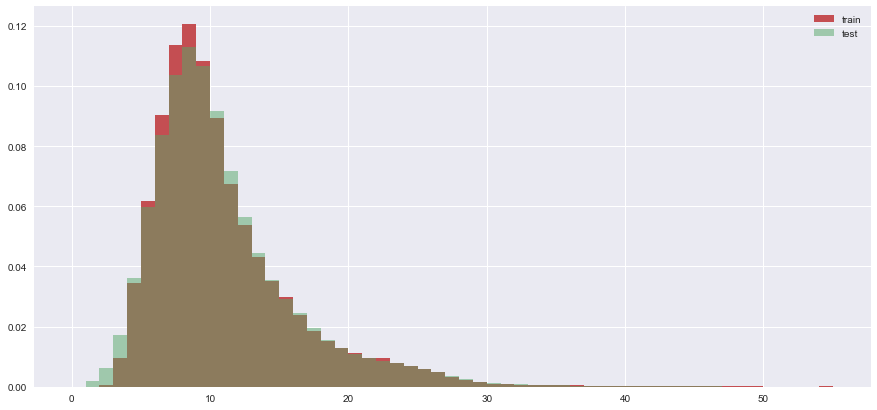

In [6]:
##words
from sklearn.feature_extraction.text import CountVectorizer

Tokenizer= CountVectorizer().build_tokenizer()

dist_train = train_qs.apply(Tokenizer).apply(len)
dist_test = test_qs.apply(Tokenizer).apply(len)

plt.figure(figsize=(15,7))
plt.hist(dist_train, bins=55, normed=True, range=[0,55], label='train', color=pal[2] )
plt.hist(dist_test, bins=55, normed=True, range=[0,55], label='test',alpha = 0.5, color=pal[1])
plt.legend()
plt.show()

# WordCloud

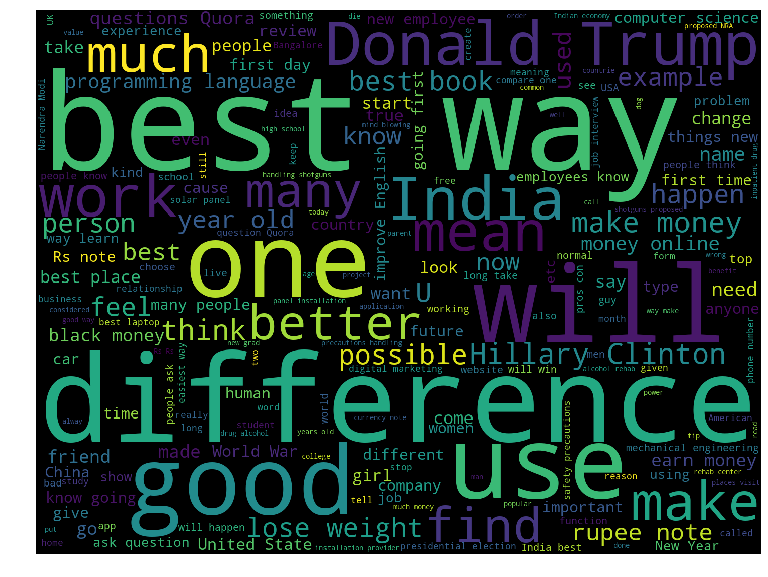

In [7]:
##WordCloud
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs))  #directly input the whole document
plt.figure(figsize=(20, 10))    #set the size of output img
plt.imshow(cloud)    #matplotlib.pylab(as plt) show img using imshow(img)
plt.axis('off')   #make axis transparent
plt.show()  #show the img


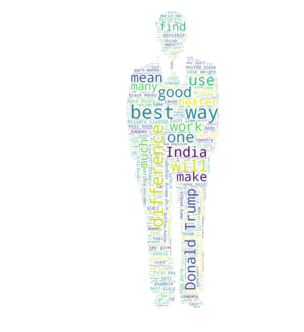

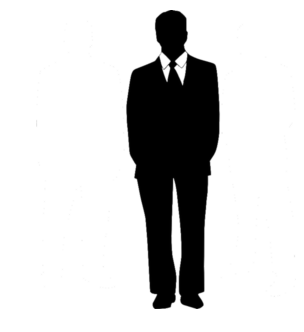

In [34]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

# Read the whole text.
text = " ".join(train_qs)

# read the mask image
mask = np.array(Image.open("images\suit1.png"))

# set stopwords
# stopwords = set(STOPWORDS)
# stopwords.add("co")
# stopwords.add("ltd")
# stopwords.add("corp")

# generate word cloud
# wc = WordCloud(background_color="white", max_words=2000, mask=mask, stopwords=stopwords)
wc = WordCloud(background_color="white", max_words=2000, mask=mask)
wc.generate(text)

# store to file
# wc.to_file("building.png")

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

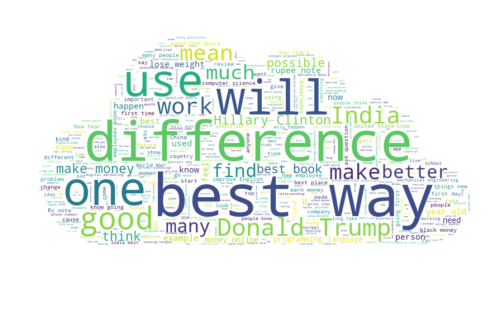

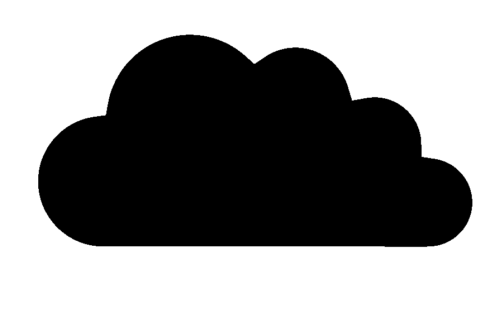

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

# Read the whole text.
text = " ".join(train_qs)

# read the mask image
mask = np.array(Image.open("images\cloud_mask.png"))

# set stopwords
# stopwords = set(STOPWORDS)
# stopwords.add("co")
# stopwords.add("ltd")
# stopwords.add("corp")

# generate word cloud
# wc = WordCloud(background_color="white", max_words=2000, mask=mask, stopwords=stopwords)
wc = WordCloud(background_color="white", max_words=2000, mask=mask)
wc.generate(text)

# store to file
# wc.to_file("building.png")

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

# Special Char Statistics

In [8]:

qmarks = np.mean(train_qs.apply(lambda x: '?' in x))
math = np.mean(train_qs.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_qs.apply(lambda x: '.' in x))
capital_first = np.mean(train_qs.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_qs.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_qs.apply(lambda x: max([y.isdigit() for y in x])))

print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
print('Questions with [math] tags: {:.2f}%'.format(math * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

Questions with question marks: 99.87%
Questions with [math] tags: 0.12%
Questions with full stops: 6.31%
Questions with capitalised first letters: 99.81%
Questions with capital letters: 99.95%
Questions with numbers: 11.83%
